<a href="https://colab.research.google.com/github/GoodJinMo/kfq_ML_2023/blob/main/ML_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 앙상블

---
**Voting** - 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정,
서로 다른 알고리즘을 가진 분류기를 결합 \

**Bagging** - 여러 개의 분류기가 투표를 통해 최종 예측 결과 결정,
각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 ,데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것 \
ex) 랜덤 포레스트 알고리즘

**boosting** - 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측인 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행


In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 보팅(Voting)

---

 **하드 보팅** - 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정

 **소프트 보팅** - 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

*일반적으로 소프트 보팅이 보팅방법으로 적용*

In [55]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [57]:
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [58]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)


In [59]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],voting='soft')

In [60]:
vo.fit(x_train,y_train)
pred = vo.predict(x_test)
print("정확도:",accuracy_score(y_test,pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.958041958041958


In [61]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred1 = model.predict(x_test)
  print(model.__class__.__name__)
  print("정확도:",accuracy_score(y_test,pred1),'\n')

LogisticRegression
정확도: 0.951048951048951 

KNeighborsClassifier
정확도: 0.9370629370629371 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
df['label']=cancer.target

In [63]:
ss = StandardScaler()
ss.fit(cancer.data)
scaled_data = ss.transform(cancer.data)

In [64]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 cancer.target)

In [65]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')

In [66]:
vo.fit(x_train,y_train)
pred =vo.predict(x_test)
print("정확도:",accuracy_score(y_test,pred))


정확도: 0.9790209790209791


# 랜덤 포레스트

---

앙살블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며 다양한 영역에서 높은 예측 성능을 보인다.

여러 개의 결정 트리 분류기가 전체데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됩니다

In [42]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [43]:
path ="/content/drive/MyDrive/Colab Notebooks/UHD"
df = pd.read_csv(path+'/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(path+'/train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(path+'/test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(path+'/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(path+'/test/y_test.txt',sep='\s+',header=None,names=['action'])


In [44]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))

<ipython-input-44-d40770af0520>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


KeyboardInterrupt: ignored

In [ ]:
ss = StandardScaler()
ss.fit(x_train)
scaled_xtr = ss.transform(x_train)
scaled_xte = ss.transform(x_test)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[rf,lr,knn]
for model in models:
  model.fit(scaled_xtr,y_train)
  pred = model.predict(scaled_xte)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))


In [ ]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
vo = VotingClassifier(estimators=[('LR',lr),('KNN',knn)],
                      voting='soft')
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[vo,rf,lr,knn]
for model in models:
  model.fit(scaled_xtr,y_train)
  pred = model.predict(scaled_xte)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params = {
    'max_depth':[8,16,24],
    'min_samples_leaf':[1,6,12],
    'min_samples_split':[2,8,6]
}


In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
gs =GridSearchCV(rf,param_grid=params)
gs.fit(x_train,y_train)
print("최적 하이퍼 파라미터:",gs.best_params_)
print("정확도:",gs.best_score_)


In [ ]:
model=gs.best_estimator_

In [ ]:
pred=model.predict(x_test)

In [ ]:
print("acc:",accuracy_score(y_test,pred))

In [ ]:
sd=pd.Series(model.feature_importances_)
sd.index=x_train.columns

In [ ]:
top20=sd.sort_values(ascending=False)[:20]

In [ ]:
top20

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.barplot(x=top20,y=top20.index)
plt.show()

# GBM

---



In [4]:
from sklearn.ensemble import GradientBoostingClassifier
import time


In [5]:
gbs = GradientBoostingClassifier()
st =time.time()
gbs.fit(x_train,y_train)
et = time.time()
print("학습 소요 시간:",et-st)
pred = gbs.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print("정확도:",accuracy)


NameError: ignored

# XGBoost

---
분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냅니다.

GBM에 기반, 병령 CPU환경에서 병령 학습이 가능해 기존 GBM보다 빠르게 학습을 완료할 수 있습니다.


In [8]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [9]:
dataset = load_breast_cancer()
data= dataset.data
label = dataset.target

df = pd.DataFrame(data, columns=dataset.feature_names)
df['target']= label
df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [10]:
x_train, x_test, y_train, y_test=train_test_split(data, label)
x_tr, x_val, y_tr, y_val= train_test_split(x_train, y_train, test_size=0.1)


In [11]:
dtr = xgb.DMatrix(data=x_tr, label=y_tr)
dval = xgb.DMatrix(data=x_val, label=y_val)
dtest = xgb.DMatrix(data=x_test , label=y_test)


In [12]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400


In [13]:
eval_list = [(dtr,'train'),(dval,'eval')]

xgb_model = xgb.train(params = params ,
                      dtrain = dtr ,
                      num_boost_round = num_rounds,
                      early_stopping_rounds = 50,
                      evals = eval_list )


[0]	train-logloss:0.65223	eval-logloss:0.65430
[1]	train-logloss:0.61506	eval-logloss:0.61914
[2]	train-logloss:0.58116	eval-logloss:0.58718
[3]	train-logloss:0.55012	eval-logloss:0.55804
[4]	train-logloss:0.52162	eval-logloss:0.53165
[5]	train-logloss:0.49543	eval-logloss:0.50874
[6]	train-logloss:0.47016	eval-logloss:0.47996
[7]	train-logloss:0.44595	eval-logloss:0.45287
[8]	train-logloss:0.42518	eval-logloss:0.43567
[9]	train-logloss:0.40418	eval-logloss:0.41193
[10]	train-logloss:0.38467	eval-logloss:0.38982
[11]	train-logloss:0.36802	eval-logloss:0.37612
[12]	train-logloss:0.35091	eval-logloss:0.35836
[13]	train-logloss:0.33496	eval-logloss:0.34182
[14]	train-logloss:0.32130	eval-logloss:0.33070
[15]	train-logloss:0.30735	eval-logloss:0.31758
[16]	train-logloss:0.29397	eval-logloss:0.30191
[17]	train-logloss:0.28142	eval-logloss:0.28993
[18]	train-logloss:0.26960	eval-logloss:0.27598
[19]	train-logloss:0.25957	eval-logloss:0.26812
[20]	train-logloss:0.24896	eval-logloss:0.25852
[2

In [14]:
pp = xgb_model.predict(dtest)
print(np.round(pp[:10],3))

p = [ 1 if x > 0.5 else 0 for x in pp ]
print('예측값:',p[:10])


[0.986 0.99  1.    0.992 0.    1.    0.001 0.999 0.    0.906]
예측값: [1, 1, 1, 1, 0, 1, 0, 1, 0, 1]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [16]:
get_clf_eval(y_test,p,pp)


오차 행렬
[[56  2]
 [ 0 85]]
정확도: 0.9860, 정밀도: 0.9770, 재현율: 1.0000,    F1: 0.9884, AUC:0.9998


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [18]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[lr,knn]
for model in models:
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  pred_prob=model.predict_proba(x_test)[:,1]
  print("\n",model.__class__.__name__)
  get_clf_eval(y_test , pred, pred_prob)



 LogisticRegression
오차 행렬
[[56  2]
 [ 2 83]]
정확도: 0.9720, 정밀도: 0.9765, 재현율: 0.9765,    F1: 0.9765, AUC:0.9986

 KNeighborsClassifier
오차 행렬
[[56  2]
 [ 4 81]]
정확도: 0.9580, 정밀도: 0.9759, 재현율: 0.9529,    F1: 0.9643, AUC:0.9802


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)


In [20]:
from xgboost import XGBClassifier

In [21]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=0.1,
                            max_depth=3)
xgb_wrapper.fit(x_train, y_train)
w_preds = xgb_wrapper.predict(x_test)
w_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]
get_clf_eval(y_test , w_preds, w_pred_proba)


오차 행렬
[[54  5]
 [ 3 81]]
정확도: 0.9441, 정밀도: 0.9419, 재현율: 0.9643,    F1: 0.9529, AUC:0.9863


# LightGBM

---
XGBoost보다 학습에 걸리는 시간이 훨씬 적다,\
메모리 사용량도 상대적으로 적다\
XGBoost 의 예측 성능은 별다른 차이 없음

적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다


In [22]:
import lightgbm
from lightgbm import LGBMClassifier


In [ ]:
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.05)

evals = [(x_tr, y_tr), (x_val, y_val)]
lgbm.fit(x_tr, y_tr,
                 early_stopping_rounds=50,
                 eval_metric="logloss",
                 eval_set=evals)
preds = lgbm.predict(x_test)
pred_proba = lgbm.predict_proba(x_test)[:, 1]


In [26]:
get_clf_eval(y_test , pred, pred_prob)

오차 행렬
[[21 38]
 [39 45]]
정확도: 0.4615, 정밀도: 0.5422, 재현율: 0.5357,    F1: 0.5389, AUC:0.4202


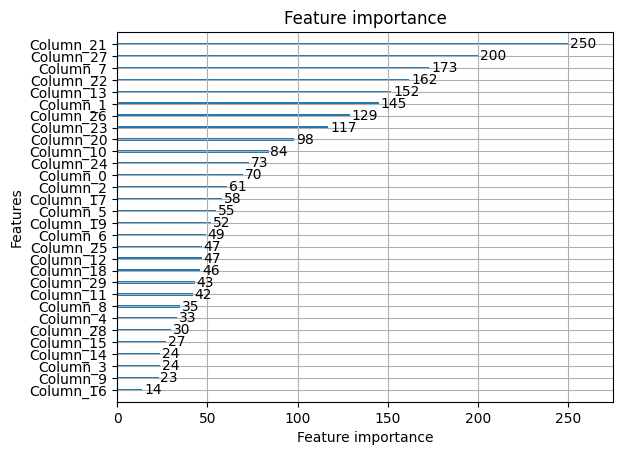

In [39]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

plot_importance(lgbm, ax=plt.gca())
plt.show()


# 베이지안 최적한 기반 하이퍼 파라미터 튜닝

---
목적 함수 식을 제대로 할 수 없는 블랙 박스 형태의 함수에서

최대 또는 최소 함수 반환 값을 만드는 최적 입력값을

가능한 적은 시도를 통해 빠르고 효과적으로 찾아주는 방식입니다.


In [40]:
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import hp
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK
from hyperopt import fmin, tpe, Trials


In [29]:
search_space = {'x': hp.quniform('x', -10, 10, 1),
                'y': hp.quniform('y', -15, 15, 1) }


In [30]:
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval


In [31]:
trial_val = Trials()
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=300,trials=trial_val)
print('best:', best_01)


100%|██████████| 300/300 [00:08<00:00, 37.43trial/s, best loss: -300.0]
best: {'x': -0.0, 'y': 15.0}


In [32]:
a=trial_val.results

In [ ]:
trial_val.results

In [ ]:
dic =trial_val.vals
for n,i in enumerate(trial_val.results):
  print("x:",dic['x'][n],"y:",dic['y'][n],i)

In [55]:
cancer = load_breast_cancer()
data = cancer.data
label = cancer.target
ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)
x_tr,x_val,y_tr,y_val = train_test_split(x_train,y_train)


In [56]:
xgb_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
             'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
            'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
            'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }


In [59]:
def objective_fun(search_space):
    model = XGBClassifier(n_estimators=100,
                          max_depth=int(search_space['max_depth']),
                          min_child_weight=int(search_space['min_child_weight']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'],
                          eval_metric='logloss')
    accuracy = cross_val_score(model,
                               x_train, y_train,
                               scoring='accuracy',
                               cv=3)
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


In [60]:
trial_val = Trials()
best = fmin(fn=objective_fun,
            space=xgb_space,
            algo=tpe.suggest,
            max_evals=500, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9)
            )
print('best:', best)


100%|██████████| 500/500 [02:20<00:00,  3.57trial/s, best loss: -0.971830985915493]
best: {'colsample_bytree': 0.5234094913067147, 'learning_rate': 0.14467783348989724, 'max_depth': 15.0, 'min_child_weight': 2.0}
